# Revisão de conceitos estatísticos III (Estimadores)

Vamos explorar alguns conceitos estatísticos aplicados à análise de sinais.

In [1]:
# importar as bibliotecas necessárias
import numpy as np # arrays
import matplotlib.pyplot as plt # plots
from scipy.stats import norm
plt.rcParams.update({'font.size': 14})
import IPython.display as ipd # to play signals
import sounddevice as sd

# Um conjunto de ruídos brancos

Vamos gerar um conjunto (ensemble) de ruídos brancos. Você pode encarar isso como se fosse uma série de gravações de um sinal aleatório. Por exemplo, como se você fosse medir a vibração em uma máquina complexa e tomasse $N_{rec}$ gravações. No caso do ruído branco temos um fenômeno governado por uma distribuição de probabilidade Gaussiana e constante com o tempo:

\begin{equation}
p(x) = \mathcal{N}(\mu_x, \sigma_x) = \frac{1}{\sqrt{2\pi}\sigma_x}\mathrm{e}^{-\frac{1}{2\sigma_x^2}(x-\mu_x)^2}
\end{equation}
em que $\mu_x$ é a média e $\sigma_{x}$ é o desvio padrão.

In [18]:
# parâmetros da distribuição de probabilidade do fenômeno
mu_x = 0.0    # média
sigma_x = 0.5 # desvio padrão - var = 0.25 (RMS**2)

# A densidade de probabilidade
x = np.arange(-10, 10, 0.01)
px = norm.pdf(x, loc= mu_x, scale = sigma_x)

# Número de gravações
N_rec = 2000

# Os sinais - vão ser gravados numa matriz N_rec x len(time)
fs = 2000
time = np.arange(0,2, 1/fs)
xt = np.random.normal(loc = mu_x, scale = sigma_x, size=(N_rec,len(time)))

# Vamos escolher 5 gravações do conjunto de sinais gravados para plotar $x(t)$

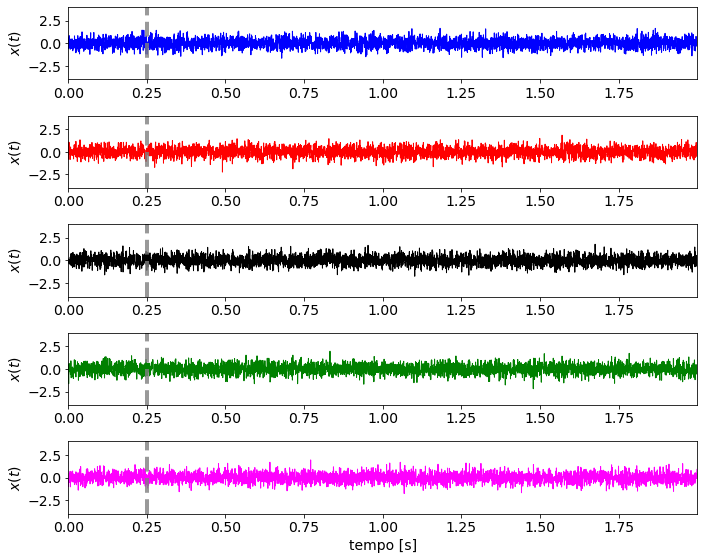

In [13]:
rec_choose = np.random.randint(N_rec+1, size=5)
color = ['b', 'r', 'k', 'g', 'magenta']

fig, axs = plt.subplots(5, 1, figsize = (10, 8))
for i in np.arange(5):
    axs[i].plot(time, xt[rec_choose[i]], linewidth = 1, color = color[i])
    axs[i].axvline(0.25, color='grey',linestyle = '--', linewidth = 4, alpha = 0.8)
    axs[i].set_ylabel(r'$x(t)$')
    axs[i].set_xlim((0, time[-1]))
    axs[i].set_ylim((-4, 4))
axs[i].set_xlabel('tempo [s]')
plt.tight_layout()

# Computar os momentos para o estimador do conjunto.

In [14]:
# Escolha 1 ou 2 instantes de tempo e calcule as amostras
n_1 = int(0.25*fs)
n_2 = int(0.73*fs)

# Primeiro momento
Ex_1 = (1/N_rec)*np.sum(xt[:, n_1])
Ex_2 = (1/N_rec)*np.sum(xt[:, n_2])
print("E[x] para t_1 é {:.4f}".format(Ex_1))
print("E[x] para t_2 é {:.4f}".format(Ex_2))

# Segundo momento
Ex2_1 = (1/N_rec)*np.sum((xt[:, n_1]-Ex_1)**2)
Ex2_2 = (1/N_rec)*np.sum((xt[:, n_2]-Ex_2)**2)
print("E[(x-\mu_x)^2] para t_1 é {:.4f}".format(Ex2_1))
print("E[(x-\mu_x)^2] para t_2 é {:.4f}".format(Ex2_2))

E[x] para t_1 é 0.0157
E[x] para t_2 é -0.0568
E[(x-\mu_x)^2] para t_1 é 0.3184
E[(x-\mu_x)^2] para t_2 é 0.3158


# Agora, tome apenas 1 das gravações (estimador do sinal)

Encare isso como sendo a única gravação que você fez. 

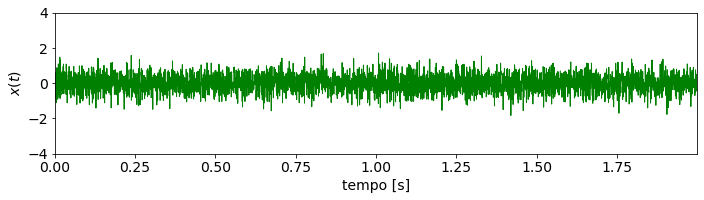

In [5]:
rec_choose = np.random.randint(N_rec+1, size=1)
xt_rec = np.reshape(xt[rec_choose,:], len(time))

plt.figure(figsize = (10, 3))
plt.plot(time, xt_rec, linewidth = 1, color = 'g')
plt.ylabel(r'$x(t)$')
plt.xlim((0, time[-1]))
plt.ylim((-4, 4))
plt.xlabel('tempo [s]')
plt.tight_layout()

# Computar os momentos do sinal.

In [16]:
# Primeiro momento
Ex = np.mean(xt_rec)
Ex2 = np.std(xt_rec)**2
x_rms = np.sqrt((1/len(time))*np.sum(xt_rec**2))

print("E[x] para o sinal é {:.4f}".format(Ex))
print("E[(x-\mu_x)^2] para o sinal é {:.4f}".format(Ex2))
print("O quadrado do valor RMS é {:.4f}".format(x_rms**2))

E[x] para o sinal é -0.0010
E[(x-\mu_x)^2] para o sinal é 0.2436
O quadrado do valor RMS é 0.2436


# Computar a distribuição dos momentos calculados

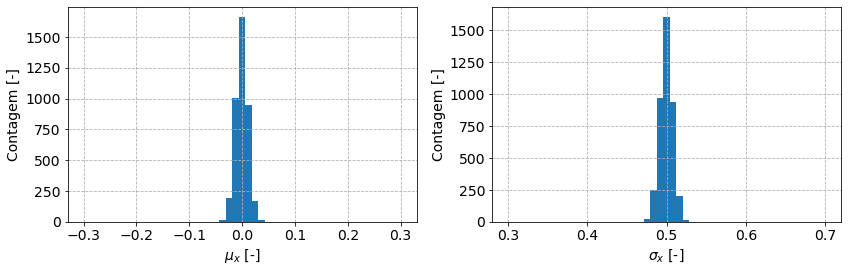

In [19]:
# Estimador do conjunto
mu_x_conj = np.mean(xt, axis = 0)
std_x_conj = np.std(xt, axis = 0)

# Figura
fig, axs = plt.subplots(1, 2, figsize = (12, 4))
axs[0].hist(mu_x_conj, bins = np.linspace(-0.3, 0.3, 50))
axs[0].grid(linestyle = '--', which='both')
axs[0].set_ylabel('Contagem [-]')
axs[0].set_xlabel(r'$\mu_x$ [-]')

axs[1].hist(std_x_conj, bins = np.linspace(0.3, 0.7, 50))
axs[1].grid(linestyle = '--', which='both')
axs[1].set_ylabel('Contagem [-]')
axs[1].set_xlabel(r'$\sigma_x$ [-]')
plt.tight_layout()

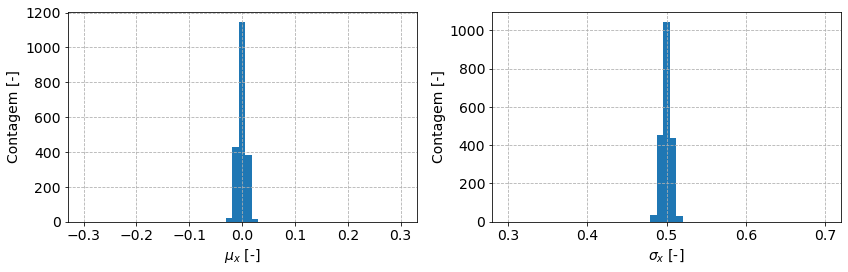

In [20]:
# Estimador do sinal
mu_x_rec = np.mean(xt, axis = 1)
std_x_rec = np.std(xt, axis = 1)

# Figura
fig, axs = plt.subplots(1, 2, figsize = (12, 4))
axs[0].hist(mu_x_rec, bins = np.linspace(-0.3, 0.3, 50))
axs[0].grid(linestyle = '--', which='both')
axs[0].set_ylabel('Contagem [-]')
axs[0].set_xlabel(r'$\mu_x$ [-]')

axs[1].hist(std_x_rec, bins = np.linspace(0.3, 0.7, 50))
axs[1].grid(linestyle = '--', which='both')
axs[1].set_ylabel('Contagem [-]')
axs[1].set_xlabel(r'$\sigma_x$ [-]')
plt.tight_layout()